In [17]:
from hossam import load_data
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
import numpy as np
import pandas as pd
from pandas import DataFrame


In [18]:
my_dpi = 200                                    # 이미지 선명도(100~300)
font_path = "./NotoSansKR-Regular.ttf"          # 한글을 지원하는 폰트 파일의 경로
fm.fontManager.addfont(font_path)               # 폰트의 글꼴을 시스템에 등록함
font_prop = fm.FontProperties(fname=font_path)  # 폰트의 속성을 읽어옴
font_name = font_prop.get_name()                # 읽어온 속성에서 폰트의 이름만 추출     
plt.rcParams['font.family'] = font_name         # 그래프에 한글 폰트 적용
plt.rcParams['font.size'] = 10                  # 기본 폰트크기
plt.rcParams['axes.unicode_minus'] = False      # 그래프에 마이너스 깨짐 방지(한글환경에서 필수)

In [19]:
origin = load_data('boston')
origin

[data] https://data.hossam.kr/data/kaggle/boston.xlsx
[desc] 보스턴 인근 지역의 인구·환경·교육·범죄·세금 정보 등을 기반으로 주택의 중위가격(MEDV)을 예측하기 위해 수집된 대표적인 회귀 분석용 주택시장 데이터 (출처: https://www.kaggle.com/datasets/altavish/boston-housing-dataset)

field    description
-------  ---------------------------------------------------------------------------------------
CRIM     타운별 1인당 범죄율 (Per capita crime rate by town)
ZN       25,000 sqft 이상 주거용 대지 비율 (Proportion of residential land zoned for large lots)
INDUS    비소매 상업구역 비율 (Proportion of non-retail business acres per town)
CHAS     찰스강 인접 여부 (Charles River dummy variable: 1 if tract bounds river; 0 otherwise)
NOX      대기 오염 정도 (Nitric oxides concentration, parts per 10 million)
RM       주택당 평균 방(Room) 수 (Average number of rooms per dwelling)
AGE      1940년 이전 건축 비율 (Proportion of owner-occupied units built prior to 1940)
DIS      5개 주요 고용센터까지의 거리 (Weighted distances to five Boston employment centers)
RAD      고속도로 접근성 지수 (Index of accessibility to radial highways)
T

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [20]:
print(f"데이터셋 크기: {origin.shape}")
print(f"행 개수: {origin.shape[0]}개")
print(f"열 개수: {origin.shape[1]}개")

데이터셋 크기: (506, 14)
행 개수: 506개
열 개수: 14개


In [21]:
origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [22]:
df = origin.astype({'CHAS': 'category'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    int64   
 9   TAX      506 non-null    int64   
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  MEDV     506 non-null    float64 
dtypes: category(1), float64(11), int64(2)
memory usage: 52.1 KB


In [23]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

결측치가 존재하지 않기 때문에 100% 완성도를 보인다.

In [24]:
fields = ['MEDV', 'CRIM', 'RM', 'LSTAT', 'NOX']

df[fields].describe().T


,count,mean,std,min,25%,50%,75%,max
MEDV,506.0,22.532806,9.197104,5.00000,17.025000,21.20000,25.000000,50.0000
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
LSTAT,506.0,12.653063,7.141062,1.73000,6.950000,11.36000,16.955000,37.9700
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710


기술통계량을 통해 확인해야 하는 항목

1. 평균과 중앙값의 차이를 통해 데이터 분포 형태를 파악한다.
우편향(Right-skewed):평균>중앙값
좌편향(Left-skewed):평균<중앙값
대칭(Symmetirc):평균=중앙값
이 방법은 평균과 중앙값이 완전히 일치할 경우만 대칭으로 판단하기 때문에 매우 극단적임.
추론통계에서 공부하게 될 신뢰수준의 개념이 추가적으로 적용되어야 한다.
사분위수 구간을 활용할 수도 있으나 같은 내용이므로 평균 vs 중앙값만 비교해도 충분함.

2. 최소,최대값을 통해 데이터 구간을 파악하고 변수간의 구간 차이가 큰지 여부를 확인한다.
변수간의 구간 차이가 크다면 추론 통계 과정에서 스케일링, 로그변환 등의 적용을 고려해야 함.
값을 통한 비교가 어려울 경우 상자그림, 히스토그램, kde플롯 등을 통해 확인할 수 있다.

In [25]:
result = []

for f in fields:
    mean_val = df[f].mean()
    median_val = df[f].median()

    if mean_val > median_val:
        skew_type = "Right-skewed"
    elif mean_val < median_val:
        skew_type = "Left-skewed"
    else:
        skew_type = "Symmetirc"

    result.append({
        'field':f, 'mean':mean_val, 'median':median_val, 'skew':skew_type
    })
DataFrame(result)

,field,mean,median,skew
0,MEDV,22.532806,21.20000,Right-skewed
1,CRIM,3.613524,0.25651,Right-skewed
2,RM,6.284634,6.20850,Right-skewed
3,LSTAT,12.653063,11.36000,Right-skewed
4,NOX,0.554695,0.53800,Right-skewed


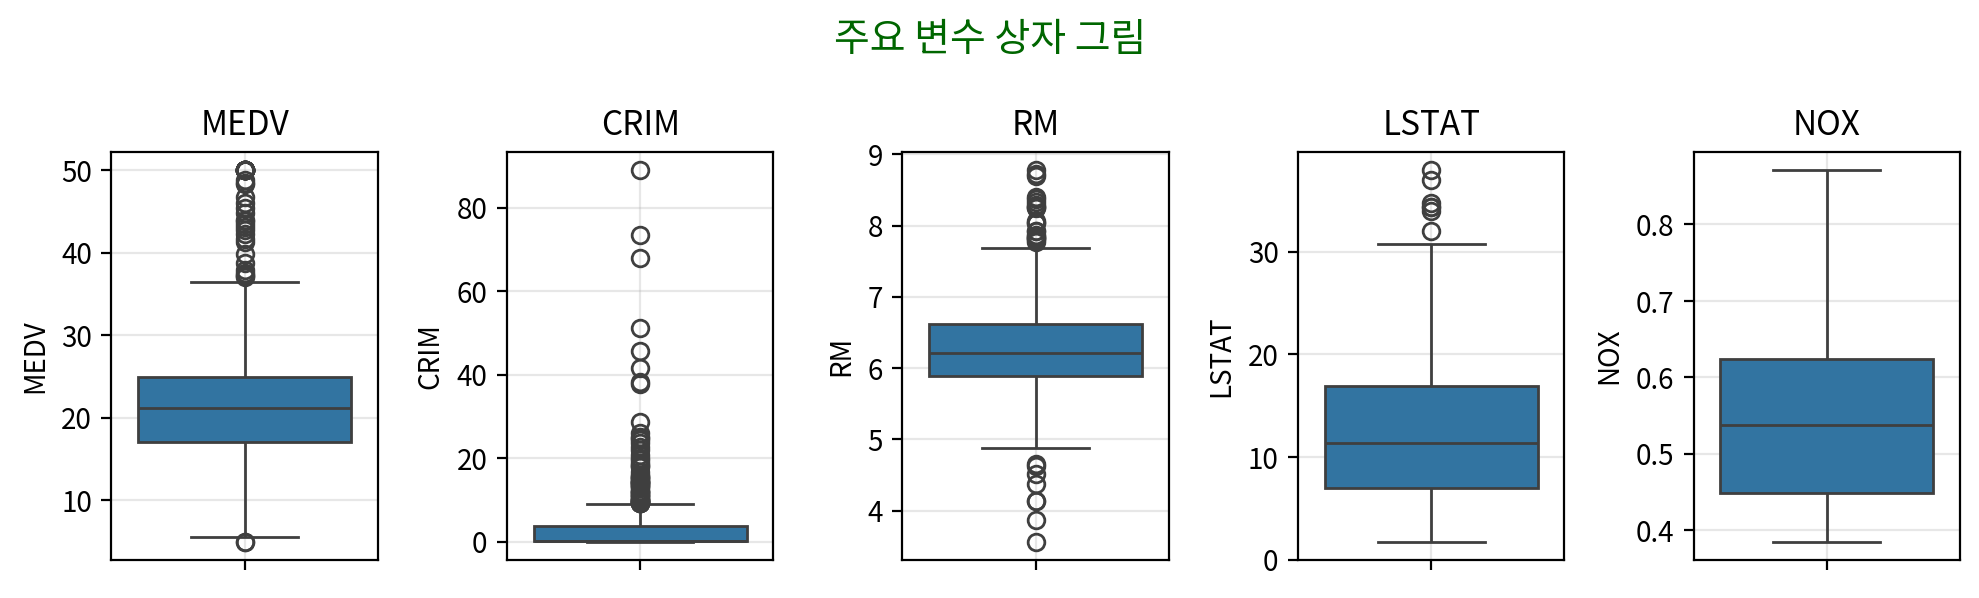

In [26]:
width_px = 2000
height_px = 600
rows = 1
cols = 5
figsize = (width_px/ my_dpi, height_px/ my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi= my_dpi)

for i, v in enumerate(fields):
    sb.boxplot(data=df,y=v, ax=ax[i])
    ax[i].set_title(v)
    ax[i].grid(alpha=0.3)

fig.suptitle('주요 변수 상자 그림', fontsize=14, color='#006600')
fig.subplots_adjust(wspace=0.2, hspace=0.2)

plt.tight_layout()
plt.show()
plt.close()

이상값이 관측되는 변수가 존재한다

이상치에 대한 처리는 분석가의 주관이 반영될 수 있기 때문에 이상치를 처리할 것인지, 그대로 둘것인지는 분석가의 판단에 따른다.

만약, 이상치를 그대로 둔다면 이상치에 민감한 분석기법들이 많기 때문에 스케일링, 로그변환 등으로 이상치에 대한 민감성을 축소시켜야 한다.

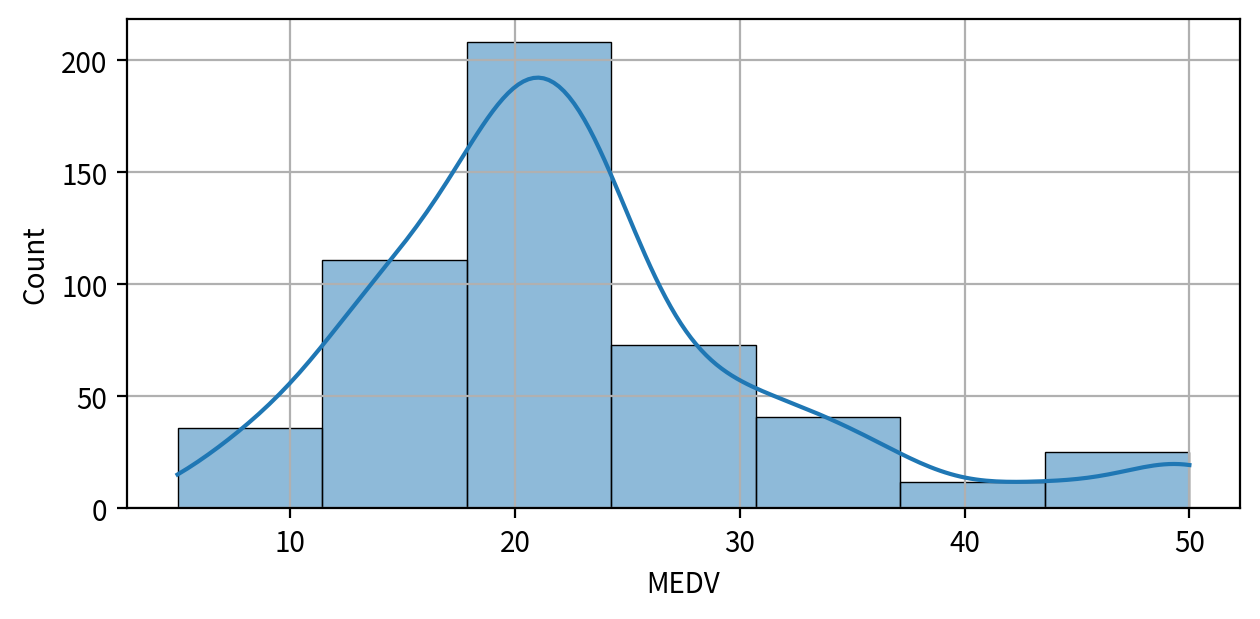

In [27]:
width_px = 1280
height_px = 640
rows = 1
cols = 1
figsize = (width_px/ my_dpi, height_px/ my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi= my_dpi)

sb.histplot(data=df, x="MEDV", bins=7, kde=True, edgecolor="#000000", linewidth=0.5)


ax.grid(True)


plt.tight_layout()
plt.show()
plt.close()

인사이트

-분포는 오른쪽 꼬리가 긴 형태를 보인다.
-평균(22.53)이 중앙값(21.2)보다 크다. 이는 오른쪽으로 치우친 분포의 전형적 특징이다.
-대다수의 값은 약 15~25 사이에 집중되어 있으며, 히스토그램의 가장 높은 구간도 이 근처에 위치한다.
-3D 이상 고가 구간의 빈도는 상대적으로 낮다, 즉 고가 지역은 소수다.
-kde곡선의 최고점이 2D 근처에 있어 최빈값은 2D전후로 관측된다.
5D 근처에서 관측되는 값은 매우 드물다. 즉 극단적 고가 값은 소수의 사례다.
10 이하의 값도 비교적 적다. 즉 매우 저가 지역 또한 상대적으로 적다.
분포 전체는 한쪽 꼬리가 길고, 중심부의 밀도가 뚜렷하며, 극단값이 존재하는 전형적인 부동산가격패턴을 보여준다.


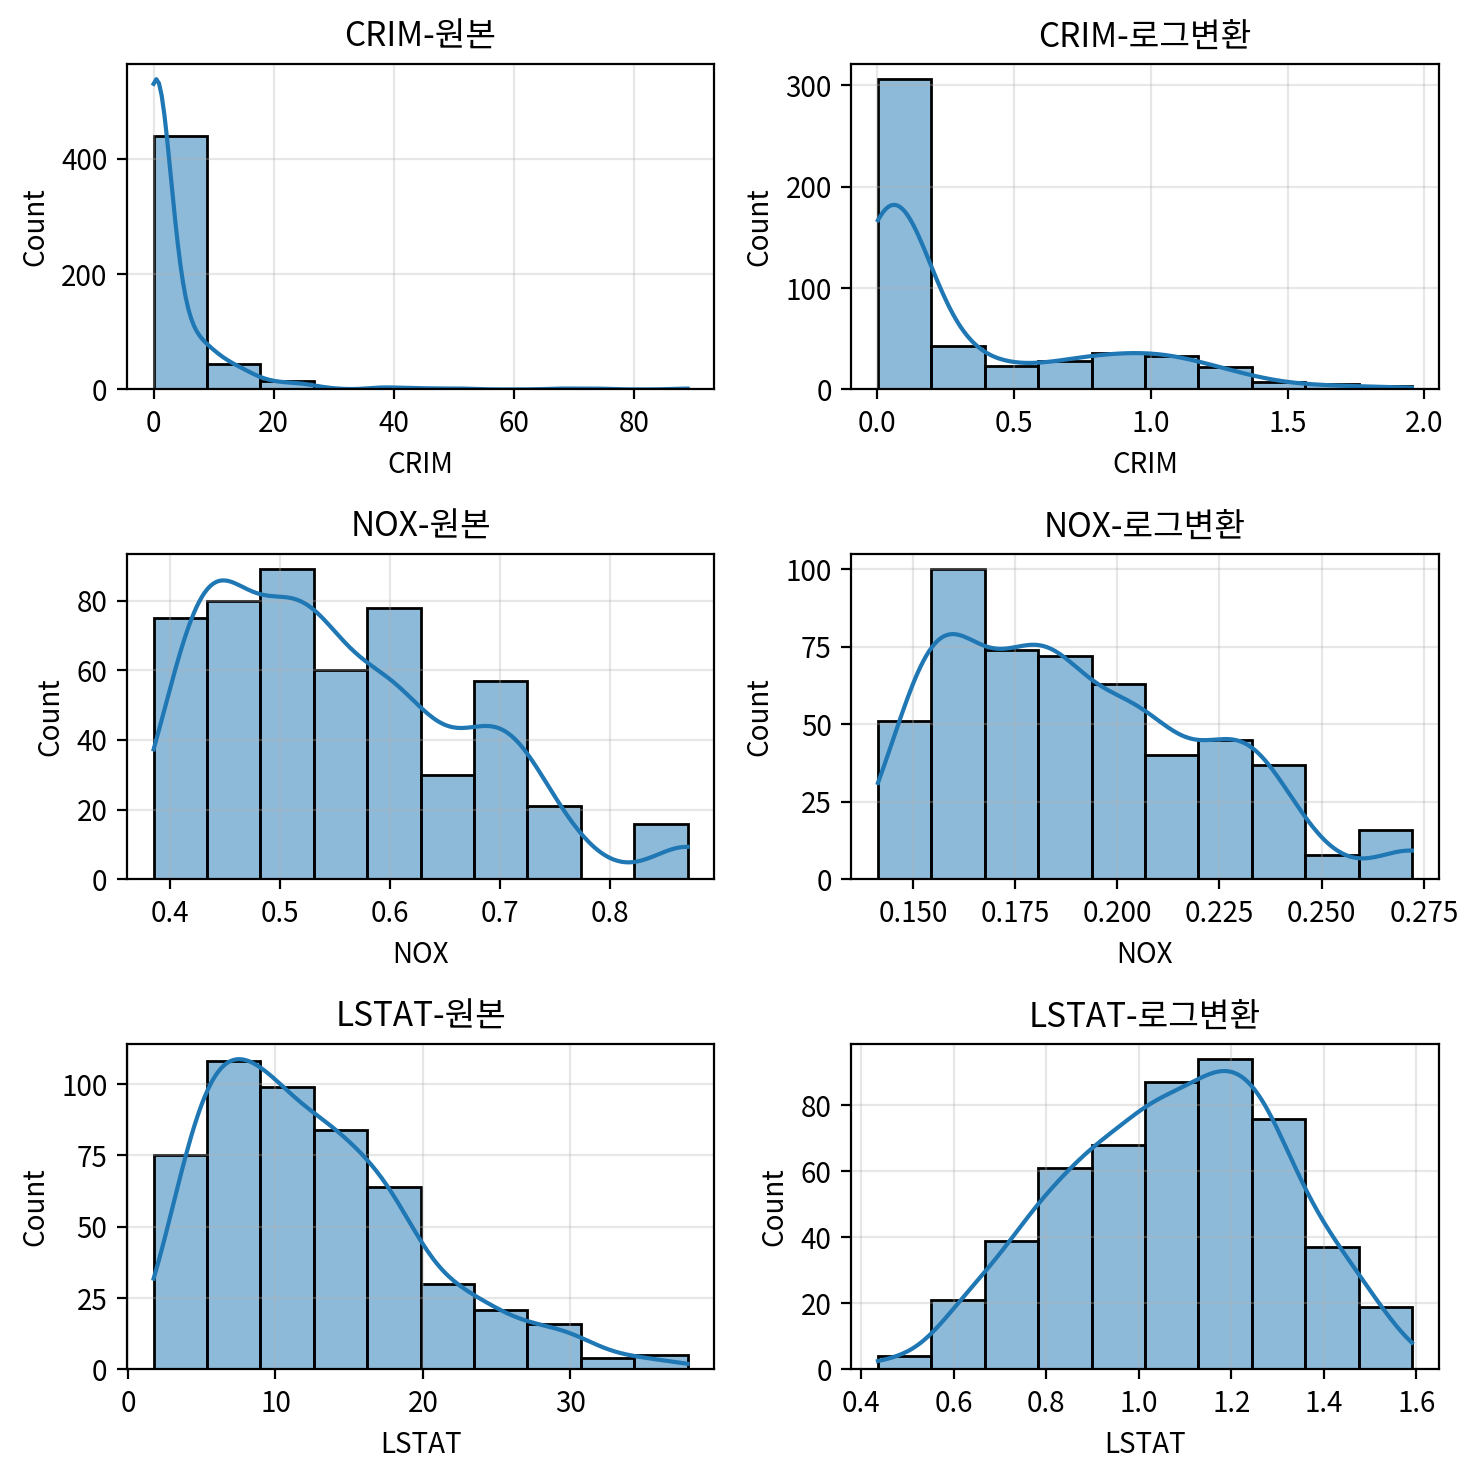

In [30]:
skewed_vars=['CRIM', 'NOX', 'LSTAT']

width_px = 1500
height_px = 1500
rows = len(skewed_vars)
cols = 2
figsize = (width_px/ my_dpi, height_px/ my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi= my_dpi)


for i, v in enumerate(skewed_vars):
    sb.histplot(data=df, x=v, bins=10, kde=True, ax=ax[i][0])
    ax[i][0].set_title(f'{v}-원본')
    ax[i][0].grid(alpha=0.3)

    log_data = np.log10(df[v] +1)
    sb.histplot(data=log_data, bins=10, kde=True, ax=ax[i][1])
    ax[i][1].set_title(f'{v}-로그변환')
    ax[i][1].grid(alpha=0.3)

fig.subplots_adjust(wspace=0.2, hspace=0.2)



plt.tight_layout()
plt.show()
plt.close()

In [32]:
chas_counts = df['CHAS'].value_counts()
chas_counts

CHAS
0    471
1     35
Name: count, dtype: int64

In [34]:
chas_props = df['CHAS'].value_counts(normalize=True) * 100
chas_props

CHAS
0    93.083004
1     6.916996
Name: proportion, dtype: float64

In [36]:
print(f"비강변 지역 (0): {chas_counts[0]:3d}개 ({chas_props[0]:.1f}%)")
print(f"강변 지역 (1):  {chas_counts[1]:3d}개 ({chas_props[1]:.1f}%)")

비강변 지역 (0): 471개 (93.1%)
강변 지역 (1):   35개 (6.9%)


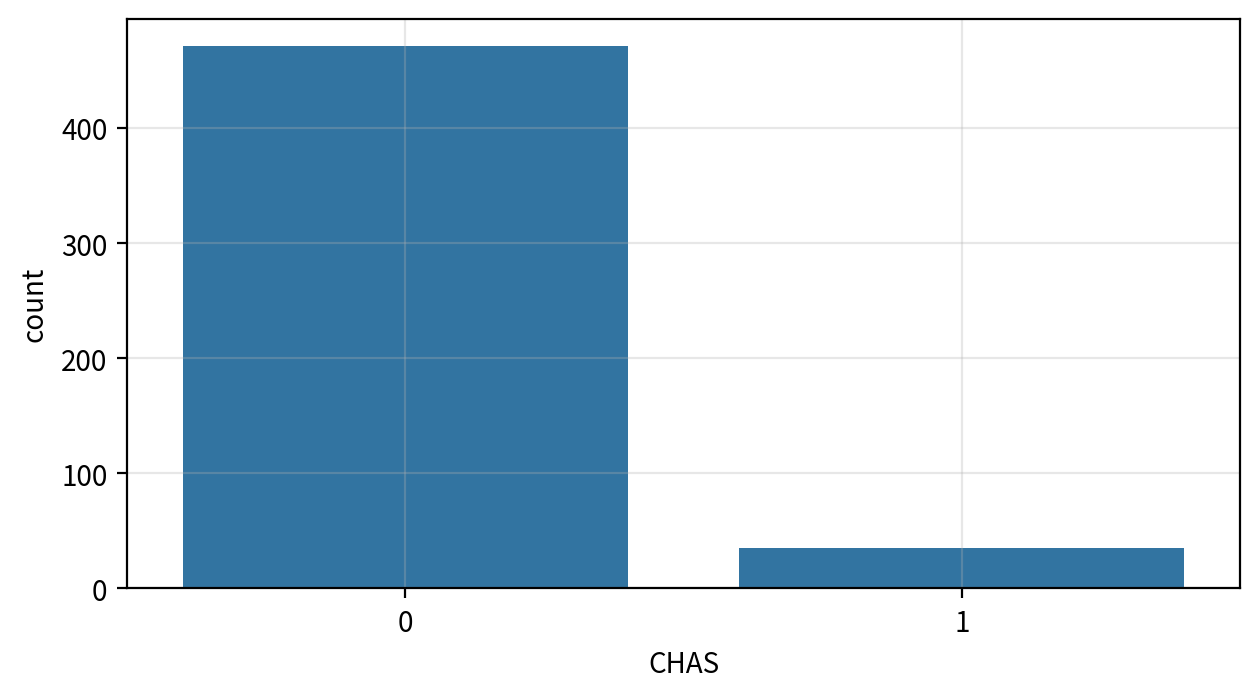

In [38]:
width_px = 1280
height_px = 720
rows = 1
cols = 1
figsize = (width_px/ my_dpi, height_px/ my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi= my_dpi)

sb.countplot(data=df, x='CHAS')


ax.grid(True, alpha=0.3)


plt.tight_layout()
plt.show()
plt.close()

In [39]:
df.groupby('CHAS')['MEDV'].describe()

C:\Users\itwill\AppData\Local\Temp\ipykernel_4488\4275711058.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('CHAS')['MEDV'].describe()


,count,mean,std,min,25%,50%,75%,max
CHAS,,,,,,,,
0,471.0,22.093843,8.831362,5.0,16.6,20.9,24.80,50.0
1,35.0,28.440000,11.816643,13.4,21.1,23.3,33.15,50.0


In [43]:
#평균 가격 차이 계산
avg_price_non_river = df[df['CHAS']==0]['MEDV'].mean()
avg_price_river = df[df['CHAS'] == 1]['MEDV'].mean()
price_diff = avg_price_river - avg_price_non_river

print(f"\n가격 차이 분석:")
print(f"비강변 지역 평균 가격: ${avg_price_non_river:.2f}K")
print(f"강변 지역 평균 가격:    ${price_diff:.2f}K ({price_diff/avg_price_non_river*100:.1f}% 높음)")


가격 차이 분석:
비강변 지역 평균 가격: $22.09K
강변 지역 평균 가격:    $6.35K (28.7% 높음)


데이터 품질을 다음 기준으로 종합 평가:

완성도: 결측값 현황
결측치가 없음.(100%완성도)

일관성:데이터 타입의 적합성
대부분의 변수가 숫자 타입.
명목형 변수의 경우는 Category 타입으로 변환 필요 
분포특성: 정규성및 이상값 현황
대부분 변수에서 우편향 분포 확인
로그 변환 혹은 스케일링으로 정규성 개선 가능


인사이트 3가지
1.평균
2.데이터범위(최대값-최소값)
3.중위값

투자 시 주의해야 할 데이터상의 특징
-강변 주변이 평균 28.7% 더 높다.
추가 분석이 필요한 영역
-흑인 비율, 부촌 여부, 교육, 교통등 다른 변수들에 대해서도 같은 흐름으로 파악이 필요함.